<a href="https://colab.research.google.com/github/Ranjankraj/Shala/blob/main/As4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

In [19]:
url = 'https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv'
data = pd.read_csv(url, header=None)
data.head()

,0,1
0,0,0.019404
1,1,0.043634
2,2,0.023797
3,3,0.444340
4,4,0.578160


In [30]:
def pdf_exp(lamb, x):
  return lamb * np.exp(-1*lamb*x)

likelihood1 = 1
likelihood2 = 1
for aa in data[1].values:
  likelihood1 = likelihood1 * pdf_exp(x= aa, lamb=1)
  likelihood2 = likelihood2 * pdf_exp(x= aa, lamb=2)

log_likelihood1 = np.log(likelihood1)
log_likelihood2 = np.log(likelihood2)
print(log_likelihood1 - log_likelihood2)


-20.366416970604874


In [36]:
sample1 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv',header=None)
sample2 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv',header=None)

print(sample1.head())
sample2.head()

   0         1
0  0 -0.179278
1  1  0.236714
2  2  0.255502
3  3 -0.029321
4  4  0.004818


,0,1
0,0,0.680541
1,1,0.436810
2,2,0.604089
3,3,0.518702
4,4,0.479711


In [73]:
significance = 0.05
# sample1[1].mean()
mu1= sample1[1].mean()
mu2 = sample2[1].mean()

s1 = np.var(sample1[1].values)
s2 = np.var(sample2[1].values)

n1 = sample1[1].shape[0]
n2 = sample2[1].shape[0]

In [74]:
# T = (mu1 - mu2)/(np.sqrt(s1**2/n1) + (s2**2/n2))
T = (mu1 - mu2) / np.sqrt((s1/n1) + (s2 / n2))


df = np.square((s1/n1) + (s2 / n2)) / (((s1/n1)**2)/(n1-1) + ((s2/n2)**2)/(n2-1))


In [64]:
!pip install scipy

In [75]:
from scipy.stats import t

critical_value = t.pdf((1-significance)/2,df)
print('T : {}, Critical Value : {}'.format(np.abs(T),critical_value))
if np.abs(T) > critical_value:
#   print('Null hypothesis is rejected')
    print('YES')
else:
#   print('Null hypothesis is not rejected')
    print('NO')
  

T : 16.930142459567165, Critical Value : 0.3555330885897884
YES


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


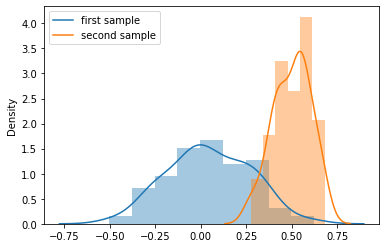

In [76]:
sns.distplot(sample1[1].values)

sns.distplot(sample2[1].values)
plt.legend(['first sample','second sample'])
plt.show()